In [257]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [258]:
data_train=pd.read_csv('202510_Laboratorio 1 - Regresión_train_data.csv')

In [259]:
data_train.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
445,1237648722835734595,167.112564,1.100982,19.53258,18.21889,17.57239,17.20468,16.99020,756,6,343,0.865726,1,GALAXY,0.088160,51900,-0.000463,0.002823
3039,1237648704051281934,208.616839,-0.214164,18.61887,17.66458,17.35265,17.22541,17.19544,752,3,435,0.917518,1,STAR,-0.000041,51942,0.001160,0.002729
3000,1237648705669169530,225.253497,1.013869,18.70398,17.75640,17.28755,17.06029,16.94730,752,6,546,0.870393,1,GALAXY,0.005791,52017,-0.000797,0.020486
433,1237648720689102933,169.123839,-0.542896,19.33370,18.38404,17.99811,17.84294,17.81207,756,2,356,0.866382,1,STAR,-0.003322,55246,-0.000765,-0.001169
1067,1237648722832719874,160.252323,1.152616,19.29324,18.90442,18.90897,19.04149,19.16719,756,6,297,0.847225,1,STAR,-0.000044,52022,-0.000007,-0.001267


completitud

In [260]:

for i in list(data_train.columns):
    print(i)
    types={type(j) for j in data_train[i]}
    print(types)
    print('')

objid
{<class 'int'>}

ra
{<class 'float'>}

dec
{<class 'float'>}

u
{<class 'float'>}

g
{<class 'float'>}

r
{<class 'float'>}

i
{<class 'float'>}

z
{<class 'float'>}

run
{<class 'int'>}

camcol
{<class 'int'>}

field
{<class 'int'>}

score
{<class 'float'>}

clean
{<class 'int'>}

class
{<class 'str'>}

redshift
{<class 'float'>}

mjd
{<class 'int'>}

rowv
{<class 'float'>}

colv
{<class 'float'>}



In [261]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO', 'S', 'QUASAR', 'G'], dtype=object)

In [262]:
categorias=list(data_train['class'].unique())
data_train['class_categorica']=data_train['class'].apply(lambda x: categorias.index(x))

data_train

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv,class_categorica
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363,0
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056,1
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028,1
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160,1
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1237648720690741273,172.826005,-0.484303,18.81890,17.89273,17.54372,17.41363,17.31821,756,2,381,0.887803,1,STAR,1.521540e-04,54891,0.000675,0.000324,0
3996,1237649918427267086,11.165126,13.745240,17.46665,15.96142,15.36014,15.14572,15.04453,1035,1,38,0.844826,1,STAR,4.182837e-05,53242,-0.000440,-0.000301,0
3997,1237648720164684046,197.579529,-0.971573,19.45682,18.32555,17.86916,17.57512,17.41648,756,1,546,0.819151,1,GALAXY,8.160563e-02,51985,0.011348,0.005854,1
3998,1237648721206575779,124.877626,-0.048110,19.20158,17.31450,16.36573,15.91760,15.57736,756,3,60,0.894044,1,GALAXY,8.744828e-02,55888,-0.004486,-0.006072,1


In [263]:
data_filtrado=data_train.drop(columns=['class'])

# Limpieza de datos
## Completitud

No hay datos nulos en ninguna columna del dataframe por lo tanto estan completos.

In [264]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   objid             4000 non-null   int64  
 1   ra                4000 non-null   float64
 2   dec               4000 non-null   float64
 3   u                 4000 non-null   float64
 4   g                 4000 non-null   float64
 5   r                 4000 non-null   float64
 6   i                 4000 non-null   float64
 7   z                 4000 non-null   float64
 8   run               4000 non-null   int64  
 9   camcol            4000 non-null   int64  
 10  field             4000 non-null   int64  
 11  score             4000 non-null   float64
 12  clean             4000 non-null   int64  
 13  class             4000 non-null   object 
 14  redshift          4000 non-null   float64
 15  mjd               4000 non-null   int64  
 16  rowv              4000 non-null   float64


## Duplicidad

Se verifica que hay duplicidad completa en 17 columnas y posteriormente se eliminan.

In [265]:
data_train[data_train.duplicated(keep=False)]

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv,class_categorica
88,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156,1
109,1237648721231609897,182.015940,-0.116600,17.96686,16.91550,16.75447,16.68648,16.70880,756,3,442,0.876962,1,S,-0.000066,51615,-0.000639,0.000270,3
114,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,STAR,0.000207,52931,0.000372,-0.001017,0
299,1237648721756225804,154.036159,0.417930,19.50457,18.08980,17.29931,16.88134,16.56668,756,4,255,0.892071,1,GALAXY,0.096783,51883,-0.000413,-0.002812,1
629,1237648720687988788,166.623017,-0.546630,19.55528,17.73928,16.86703,16.44810,16.11761,756,2,339,0.879096,1,GALAXY,0.086721,51900,0.001004,-0.001857,1
642,1237648720715710772,229.932143,-0.607750,18.34448,17.39741,17.08713,16.86085,16.67511,756,2,762,0.846381,1,GALAXY,0.037010,51689,0.004917,-0.009145,1
718,1237648721789780467,230.664376,0.229439,19.48961,18.21590,17.50523,17.09294,16.87079,756,4,767,0.872553,1,GALAXY,0.112827,51673,0.008122,0.012494,1
719,1237648721788993889,228.864817,0.317359,18.88618,17.66549,17.09694,16.72708,16.56451,756,4,755,0.881142,1,GALAXY,0.082665,51689,-0.003803,-0.000683,1
856,1237648705679065271,247.896821,0.990909,16.74659,15.61752,15.43460,15.40196,15.40794,752,6,697,0.842783,1,STAR,0.000073,51671,0.002149,-0.000930,0
897,1237646382079672642,94.883887,0.990686,17.03847,15.47224,15.10297,14.97051,14.88297,211,6,360,0.806983,1,S,0.000012,52931,-0.001483,0.001376,3


In [266]:
#Se borran directamente del dataframe los registros duplicados completos
data_train.drop_duplicates(keep = "first", inplace= True)

In [267]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3983 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   objid             3983 non-null   int64  
 1   ra                3983 non-null   float64
 2   dec               3983 non-null   float64
 3   u                 3983 non-null   float64
 4   g                 3983 non-null   float64
 5   r                 3983 non-null   float64
 6   i                 3983 non-null   float64
 7   z                 3983 non-null   float64
 8   run               3983 non-null   int64  
 9   camcol            3983 non-null   int64  
 10  field             3983 non-null   int64  
 11  score             3983 non-null   float64
 12  clean             3983 non-null   int64  
 13  class             3983 non-null   object 
 14  redshift          3983 non-null   float64
 15  mjd               3983 non-null   int64  
 16  rowv              3983 non-null   float64
 17  

No encontramos ningun duplicado parcial de objid, el cual debe ser un valor unico

In [268]:
data_train[data_train.duplicated(subset = 'objid', keep = False)].sort_values('objid')

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv,class_categorica


## Consistencia
Se encuentran inconsistencias con los valores que pertenecen a la columna class. Se implementa una correccion de estos.

In [269]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO', 'S', 'QUASAR', 'G'], dtype=object)

In [270]:
data_train['class'] = data_train['class'].replace('S','STAR')
data_train['class'] = data_train['class'].replace('QUASAR','QSO')
data_train['class'] = data_train['class'].replace('G','GALAXY')

In [271]:
data_train['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

## Estandarizacion
Teniendo en cuenta que class es una clase categorica, se decidio usar One Hot Encoder para trabajar mejor con esa variable posteriormente, teniendo en cuenta la correlacion entre los tre valores que podian tomar en class.

In [272]:
# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos categóricos
encoded_df = pd.DataFrame(encoder.fit_transform(data_train[['class']]))

# Agregar nombres a las columnas codificadas
encoded_df.columns = encoder.get_feature_names_out(['class'])

# Concatenar el DataFrame original con el DataFrame codificado
final_df = pd.concat([data_train, encoded_df], axis=1).drop(['class'], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3933
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   objid             3983 non-null   float64
 1   ra                3983 non-null   float64
 2   dec               3983 non-null   float64
 3   u                 3983 non-null   float64
 4   g                 3983 non-null   float64
 5   r                 3983 non-null   float64
 6   i                 3983 non-null   float64
 7   z                 3983 non-null   float64
 8   run               3983 non-null   float64
 9   camcol            3983 non-null   float64
 10  field             3983 non-null   float64
 11  score             3983 non-null   float64
 12  clean             3983 non-null   float64
 13  redshift          3983 non-null   float64
 14  mjd               3983 non-null   float64
 15  rowv              3983 non-null   float64
 16  colv              3983 non-null   float64
 17  

In [273]:
final_df.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,...,score,clean,redshift,mjd,rowv,colv,class_categorica,class_GALAXY,class_QSO,class_STAR
2919,1.237649e+18,122.274626,-0.019246,18.45035,17.34563,16.92556,16.74529,16.67807,756.0,3.0,...,0.790999,1.0,0.000868,53003.0,-0.000431,0.003204,0.0,1.0,0.0,0.0
1738,1.237649e+18,188.704757,-1.087920,17.97357,16.44745,15.88542,15.69061,15.58625,752.0,1.0,...,0.819122,1.0,0.000030,54567.0,0.000525,-0.000385,0.0,0.0,1.0,0.0
3329,1.237649e+18,158.464001,-0.561357,16.71868,14.98913,14.13120,13.71211,13.35774,756.0,2.0,...,0.874846,0.0,0.031340,51957.0,-0.000284,-0.000060,1.0,0.0,0.0,1.0
1112,1.237649e+18,159.239044,0.229754,16.28969,14.69252,13.92770,13.52306,13.19107,756.0,4.0,...,0.898771,1.0,0.029224,51957.0,0.004811,-0.001967,1.0,1.0,0.0,0.0
3087,1.237649e+18,129.071064,-1.035450,19.12161,18.15453,17.85553,17.73382,17.69554,756.0,1.0,...,0.858762,1.0,0.000826,58932.0,0.003774,-0.001680,3.0,1.0,0.0,0.0


In [281]:
#Se elimina la clas_categorica y class_QSO porque estan altamente correlacionadas con class_STAR y class_GALAXY
data_train = final_df.drop(columns=['class_categorica','class_QSO'])
data_train.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv,class_GALAXY,class_STAR
3963,1.237649e+18,199.056599,-0.912510,18.83805,16.92080,15.90977,15.47375,15.09178,756.0,1.0,556.0,0.837613,1.0,0.111441,51985.0,-0.001134,-0.000753,1.0,0.0
1195,1.237649e+18,235.318138,0.430069,19.23077,18.27382,17.96935,17.86463,17.81168,752.0,5.0,613.0,0.852850,1.0,-0.000558,54562.0,0.000866,0.000410,0.0,1.0
1451,1.237649e+18,167.395445,1.191939,18.36118,16.58584,15.78386,15.40607,15.14360,756.0,6.0,344.0,0.859775,1.0,0.064849,51900.0,-0.000459,-0.001384,1.0,0.0
670,1.237649e+18,204.838345,-1.036144,19.33106,18.78195,18.72104,18.53797,18.50590,756.0,1.0,595.0,0.819276,1.0,1.632158,51671.0,0.001732,-0.000383,0.0,0.0
3627,1.237649e+18,161.696483,0.227579,18.06971,16.85610,16.38543,16.20999,16.13429,756.0,4.0,306.0,0.895274,1.0,0.000076,54213.0,0.001666,0.001350,1.0,0.0


In [274]:
#rowv y colv son nuestra variable objetivo

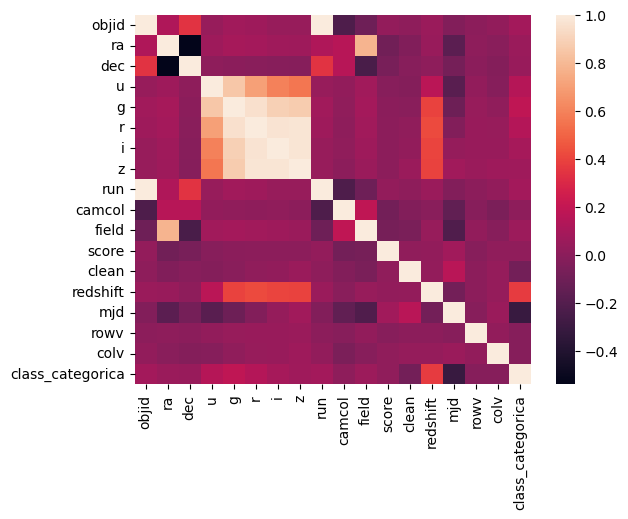

<Figure size 2000x1200 with 0 Axes>

In [275]:
#heat maps
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data_filtrado.corr())
plt.figure(figsize=(20,12))
plt.show()


In [276]:
data_modelo=data_filtrado.drop(columns=['objid','run','r','i','z'])

In [277]:
data_filtrado.filter(['colv','rowv'])

,colv,rowv
0,0.001363,0.002418
1,0.007056,0.008650
2,-0.002028,0.003938
3,0.001160,0.001839
4,-0.000465,0.001929
...,...,...
3995,0.000324,0.000675
3996,-0.000301,-0.000440
3997,0.005854,0.011348
3998,-0.006072,-0.004486


In [278]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(data_modelo.drop(columns=['rowv','colv']) , data_filtrado.filter(['redshift']))

LinearRegression()

In [279]:
modelo.predict(data_modelo.drop(columns=['rowv','colv','redshift']))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- redshift


In [ ]:
modelo.coef_

array([[-1.55873196e-06, -6.62302039e-05, -1.02076978e-03,
         9.33815008e-04, -1.89822864e-04,  1.70141473e-07,
         1.10175336e-03,  6.47104021e-04,  3.60712534e-04,
         1.48656271e-07, -1.36182796e-04],
       [-3.41422015e-06,  5.91278717e-06, -6.91162977e-04,
         1.01558912e-03, -9.62430285e-05,  1.61933983e-06,
        -1.22187303e-03,  2.33289440e-04, -4.49088209e-04,
        -1.29357441e-07, -2.58084184e-04]])